# **Cartoonify an Image**

**Importing Libraries**

In [ ]:
import cv2 #for dealing with images
import numpy as np
# required bcz used Google Colab
from google.colab.patches import cv2_imshow
from google.colab import files

**Uploading images for cartoonifying process**

In [ ]:
def read_file(filename):
  img = cv2.imread(filename)
  cv2_imshow(img)
  return img

In [ ]:
uploaded = files.upload()
filename = next(iter(uploaded))
img = read_file(filename)

**Transforming an image to grayscale image** 

**Smoothening a grayscale image**

**Retrieving the edges of an image**

In [ ]:
def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

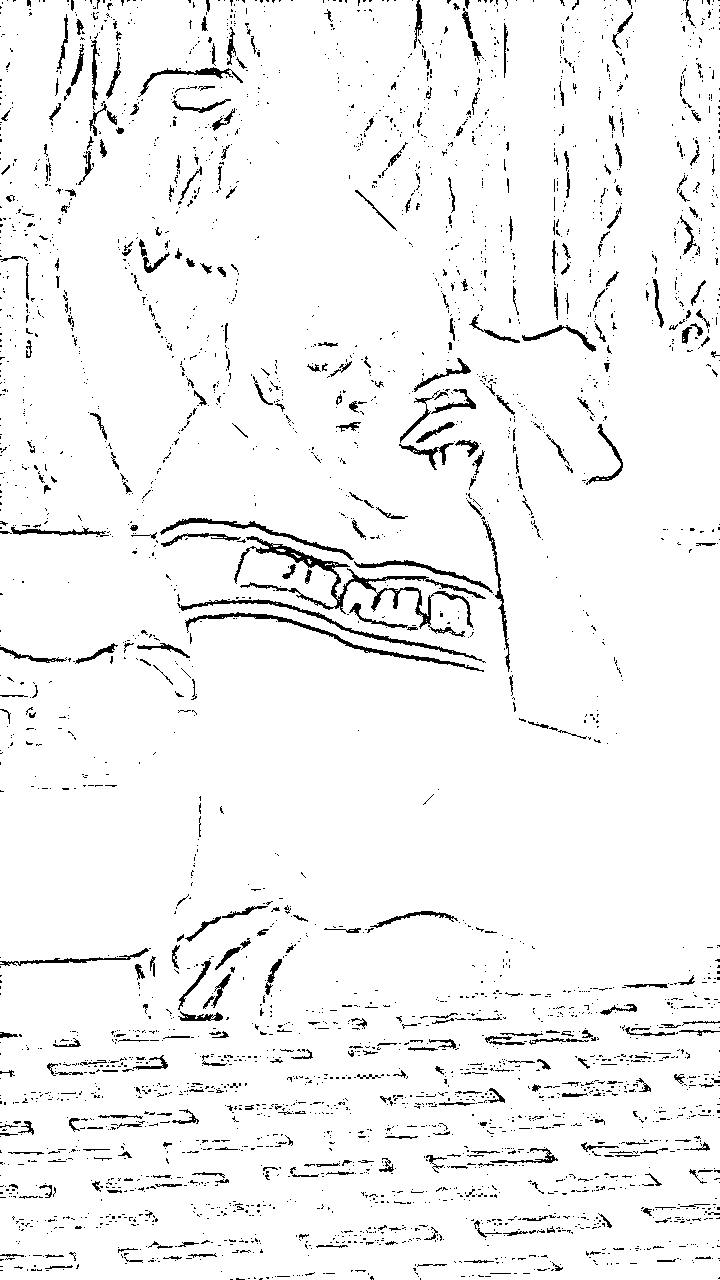

In [ ]:
line_size = 7
blur_value = 7
edges = edge_mask(img, line_size, blur_value)
cv2_imshow(edges)

**Giving a Cartoon Effect**

In [ ]:
def color_quantization(img, k):
# Transform the image
  data = np.float32(img).reshape((-1, 3))

# Determine criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

# Implementing K-Means
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

In [ ]:
total_color = 9
img = color_quantization(img, total_color)

In [ ]:
blurred = cv2.bilateralFilter(img, d=7, sigmaColor=200,sigmaSpace=200)

In [ ]:
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)

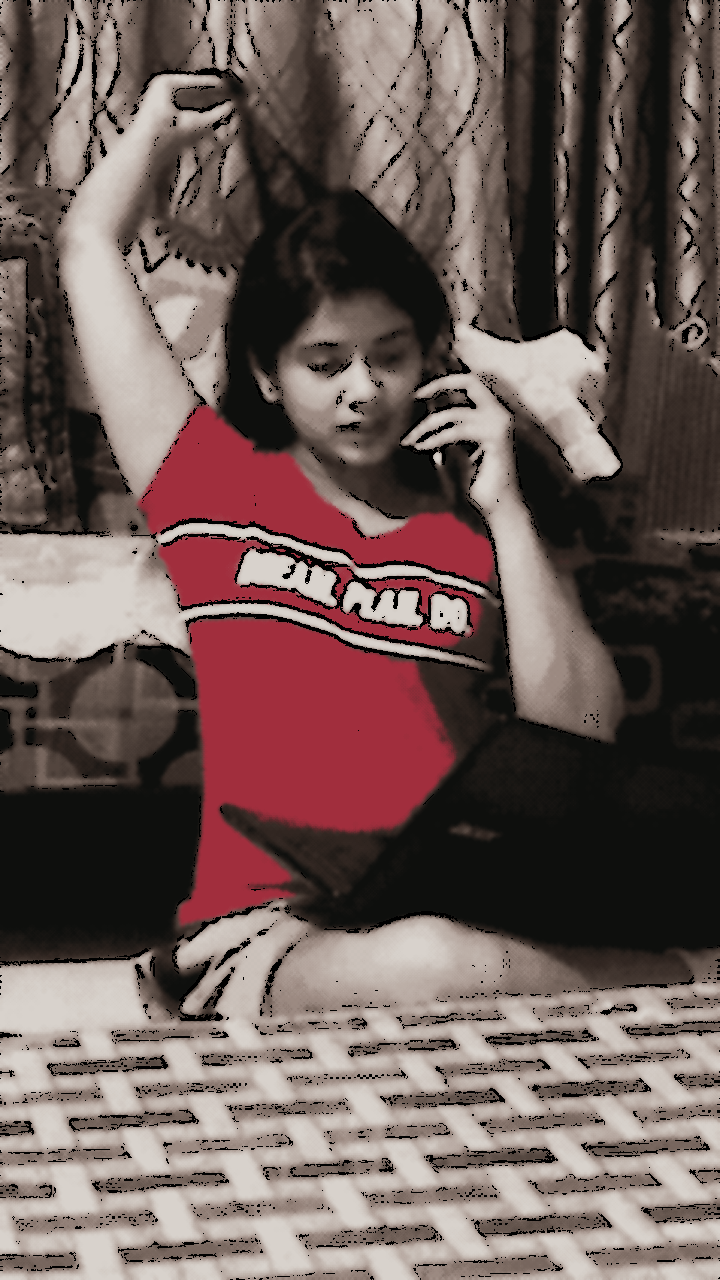

In [ ]:
cv2_imshow(cartoon)